<a href="https://colab.research.google.com/github/Andytrueno/datamuestra/blob/main/Ventas_Lima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/ventas lima.csv",sep=";")
data.head()

,DS,Y
0,2022-01-03,855.60
1,2022-01-04,2185.30
2,2022-01-05,3309.05
3,2022-01-06,3539.20
4,2022-01-07,2686.10


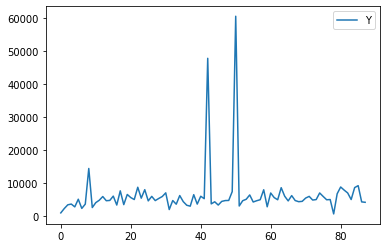

In [ ]:
data.plot()

In [ ]:
data = data.rename({'DS': 'ds', 'Y': 'y'}, axis=1)
data

,ds,y
0,2022-01-03,855.60
1,2022-01-04,2185.30
2,2022-01-05,3309.05
3,2022-01-06,3539.20
4,2022-01-07,2686.10
...,...,...
83,2022-04-11,4915.25
84,2022-04-12,8543.50
85,2022-04-13,9127.50
86,2022-04-16,4200.20


In [ ]:
data['ds'] = pd.to_datetime(data['ds'])
data.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [ ]:
m = Prophet() 
m.fit(data) 

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
m = Prophet(interval_width=0.95)
model = m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=10,freq='D')
forecast = m.predict(future)
forecast.tail(15)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
83,2022-04-11,5829.035699,-6146.708409,22827.675672,5829.035699,5829.035699,2234.967939,2234.967939,2234.967939,2234.967939,2234.967939,2234.967939,0.0,0.0,0.0,8064.003638
84,2022-04-12,5848.687970,-8676.421133,18797.260088,5848.687970,5848.687970,-392.926018,-392.926018,-392.926018,-392.926018,-392.926018,-392.926018,0.0,0.0,0.0,5455.761952
85,2022-04-13,5868.340240,-7129.454172,21155.763133,5868.340240,5868.340240,1174.233209,1174.233209,1174.233209,1174.233209,1174.233209,1174.233209,0.0,0.0,0.0,7042.573449
86,2022-04-16,5927.297053,-7782.867380,21424.104536,5927.297053,5927.297053,513.558136,513.558136,513.558136,513.558136,513.558136,513.558136,0.0,0.0,0.0,6440.855188
87,2022-04-18,5966.601594,-6391.828360,22614.665412,5966.601594,5966.601594,2234.967939,2234.967939,2234.967939,2234.967939,2234.967939,2234.967939,0.0,0.0,0.0,8201.569533
88,2022-04-19,5986.253865,-8587.113664,19749.760321,5986.253277,5986.254566,-392.926018,-392.926018,-392.926018,-392.926018,-392.926018,-392.926018,0.0,0.0,0.0,5593.327847
89,2022-04-20,6005.906136,-7485.646088,21803.628811,6005.904027,6005.908467,1174.233209,1174.233209,1174.233209,1174.233209,1174.233209,1174.233209,0.0,0.0,0.0,7180.139345
90,2022-04-21,6025.558407,-3868.137854,24417.708859,6025.554496,6025.562954,3827.711792,3827.711792,3827.711792,3827.711792,3827.711792,3827.711792,0.0,0.0,0.0,9853.270199
91,2022-04-22,6045.210678,-7633.200213,21770.185075,6045.204255,6045.217730,442.865072,442.865072,442.865072,442.865072,442.865072,442.865072,0.0,0.0,0.0,6488.075750
92,2022-04-23,6064.862948,-8145.398081,20744.042044,6064.854103,6064.872401,513.558136,513.558136,513.558136,513.558136,513.558136,513.558136,0.0,0.0,0.0,6578.421084


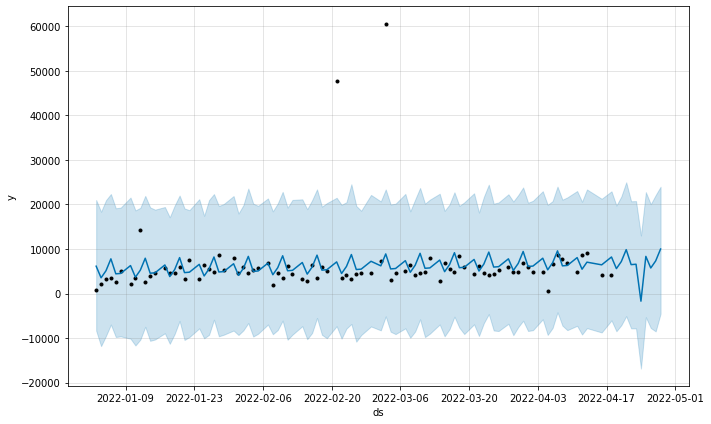

In [ ]:
plot1 = m.plot(forecast)

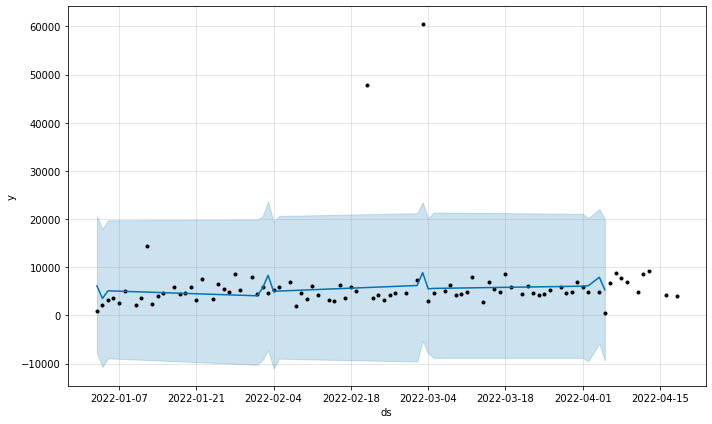

In [ ]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.day < 6]
fcst = m.predict(future2)
fig = m.plot(fcst)

In [ ]:
forecast[['ds', 'yhat']].tail(10)

,ds,yhat
88,2022-04-19,5593.327847
89,2022-04-20,7180.139345
90,2022-04-21,9853.270199
91,2022-04-22,6488.075750
92,2022-04-23,6578.421084
93,2022-04-24,-1715.894910
94,2022-04-25,8339.135429
95,2022-04-26,5730.893743
96,2022-04-27,7317.705240
97,2022-04-28,9990.836094


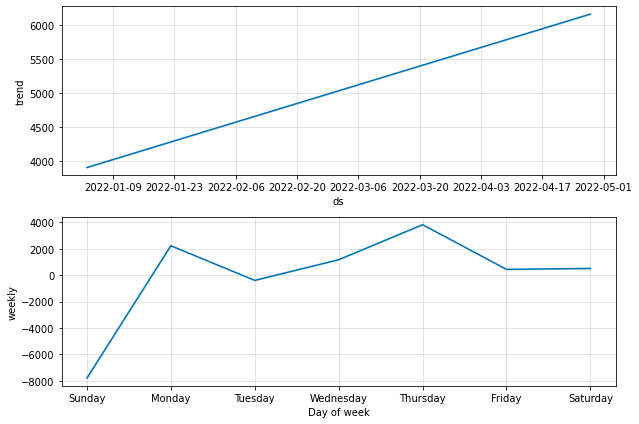

In [ ]:
plt2 = m.plot_components(forecast)